In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

In [14]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Load preprocessed dataset
df = pd.read_csv("bank_preprocessed.csv")

# Ensure all data is numeric and drop any rows with missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Split features and target
X = df.drop(columns=['y']).values
y = df['y'].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Optimized Random Forest Classifier with additional hyperparameters
rf = RandomForestClassifier(
    n_estimators=50,       
    max_depth=15,           
    max_features='sqrt',   
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1, 
    random_state=42,
    warm_start=True
)

# Train the model
rf.fit(X_train, y_train)

# Predictions and predicted probabilities
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

Optimized Random Forest Accuracy: 0.9006

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.70      0.31      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.64      0.69      9043
weighted avg       0.89      0.90      0.88      9043

Test Log Loss: 0.2181


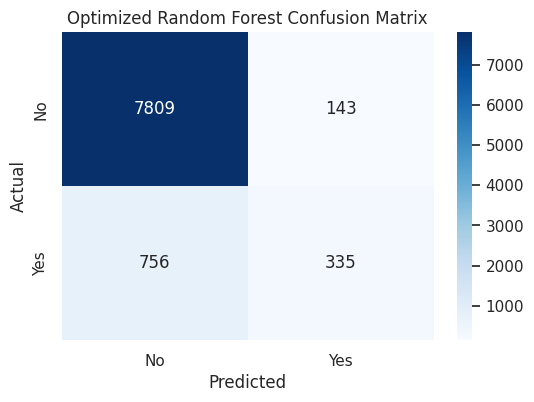

In [16]:
# Performance metrics
accuracy_val = accuracy_score(y_test, y_pred)
print(f'Optimized Random Forest Accuracy: {accuracy_val:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and print log loss on test data
test_log_loss = log_loss(y_test, y_pred_proba)
print(f"Test Log Loss: {test_log_loss:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()

In [17]:
# ---------------------------
# Learning Curves: Varying Number of Trees
# ---------------------------
n_estimators_range = range(10, 201, 10)
train_accuracies = []
test_accuracies = []
train_log_losses = []
test_log_losses = []

for n_trees in n_estimators_range:
    clf = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=15,
        max_features='sqrt',
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    # Predictions and probabilities for training and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    y_train_proba = clf.predict_proba(X_train)
    y_test_proba = clf.predict_proba(X_test)
    
    # Store accuracy scores
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store log loss values
    train_log_losses.append(log_loss(y_train, y_train_proba))
    test_log_losses.append(log_loss(y_test, y_test_proba))

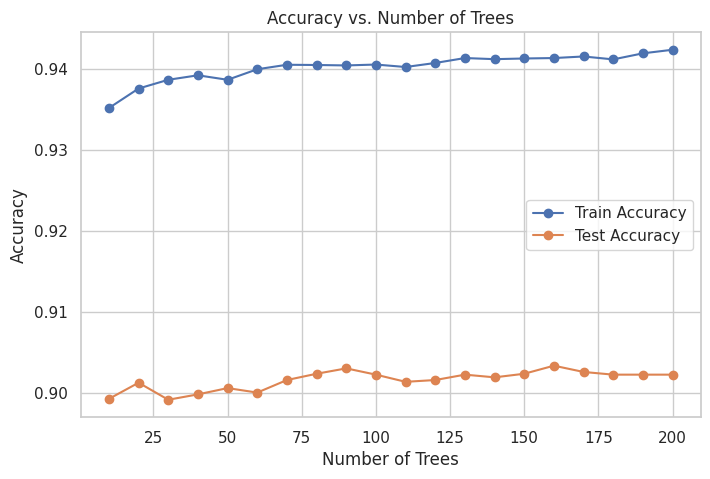

In [18]:
# Plot Accuracy vs. Number of Trees
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(n_estimators_range, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.show()

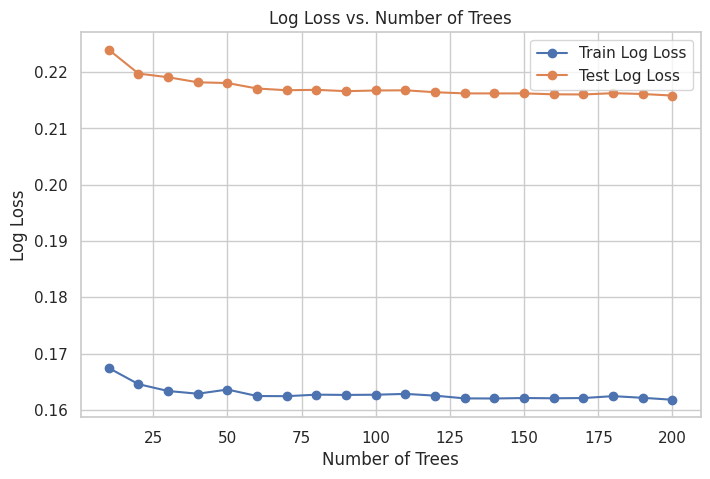

In [19]:
# Plot Log Loss vs. Number of Trees
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_log_losses, label="Train Log Loss", marker='o')
plt.plot(n_estimators_range, test_log_losses, label="Test Log Loss", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Log Loss")
plt.title("Log Loss vs. Number of Trees")
plt.legend()
plt.grid(True)
plt.show()
